# DATA PREPARATION AND EXPORT

### 1. Import pandas library and read CSV file

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/survey_results_public.csv', sep=",", header=0)
print(f'Number of rows: {len(df)}')
df.head(5)

Number of rows: 89184


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


### 2. Data Cleaning

#### I. Drop unnecessary columns

In [11]:
# Q120 - only one unique value - irrelevant information, checking if there are more column like this

for column in df:
    unique_values = df[column].unique()
    if len(unique_values) < 5:
        print(f'Column name: {column:20} | unique values: {unique_values}')

cols = ["Q120", "SurveyLength", "SurveyEase", 'SOAI']
df.drop(cols, inplace=True, axis=1)
# SurveyLentgh, SurveyEase - irrelevant information for further analysis
# SOAI long strings containing user opinions about AI, great for NLP, not exactly for this project

Column name: Q120                 | unique values: ['I agree']
Column name: RemoteWork           | unique values: [nan 'Remote' 'Hybrid (some remote, some in-person)' 'In-person']
Column name: PurchaseInfluence    | unique values: [nan 'I have a great deal of influence' 'I have some influence'
 'I have little or no influence']
Column name: TechList             | unique values: [nan 'Investigate' 'Given a list' 'Other']
Column name: SOAccount            | unique values: [nan 'Yes' 'No' "Not sure/can't remember"]
Column name: AISelect             | unique values: [nan 'Yes' "No, and I don't plan to" 'No, but I plan to soon']
Column name: TBranch              | unique values: [nan 'Yes' 'No']
Column name: ICorPM               | unique values: [nan 'People manager' 'Individual contributor']
Column name: SurveyLength         | unique values: [nan 'Appropriate in length' 'Too long' 'Too short']
Column name: SurveyEase           | unique values: [nan 'Easy' 'Neither easy nor difficult' 'Diffi

#### II. Remove duplicate and Incomplete Cases

In [12]:
# Removing rows where more than 60% of columns is null
n_columns = len(df.columns)
# n_incomplete = 0
# for row in df.index:
#     n_nulls = 0
#     for column in df:
#         if pd.isnull(df[column][row]):
#             n_nulls += 1
#     if n_nulls/n_columns > 0.6:
#         n_incomplete += 1
# print(n_incomplete)

# much, much faster way to do so
mostly_nulls = df.isnull().sum(axis=1)
mostly_nulls_count = mostly_nulls[mostly_nulls/n_columns > 0.6]
df.drop(mostly_nulls_count.index, inplace=True)
print(f'Removed {len(mostly_nulls_count)}')

Removed 5765


In [13]:
# Check for duplicates
duplicates = df.iloc[:,1:].duplicated().any()
print(duplicates)
# unique values
duplicates = df['ResponseId'].duplicated().any()
print(duplicates)

False
False


#### III. Handle data types

In [14]:
with pd.option_context('display.max_rows', None):
    display(df.dtypes)

ResponseId                               int64
MainBranch                              object
Age                                     object
Employment                              object
RemoteWork                              object
CodingActivities                        object
EdLevel                                 object
LearnCode                               object
LearnCodeOnline                         object
LearnCodeCoursesCert                    object
YearsCode                               object
YearsCodePro                            object
DevType                                 object
OrgSize                                 object
PurchaseInfluence                       object
TechList                                object
BuyNewTool                              object
Country                                 object
Currency                                object
CompTotal                              float64
LanguageHaveWorkedWith                  object
LanguageWantT

#### IV. Threat null values

In [15]:
# replace nulls in text columns with 'NA'
cols = [column for column in df if df[column].isnull().sum()>0 and df[column].dtype == 'object']
df = df.fillna(dict.fromkeys(cols, 'NA'))
with pd.option_context('display.max_rows', None):
    display(df.isnull().sum())

ResponseId                                 0
MainBranch                                 0
Age                                        0
Employment                                 0
RemoteWork                                 0
CodingActivities                           0
EdLevel                                    0
LearnCode                                  0
LearnCodeOnline                            0
LearnCodeCoursesCert                       0
YearsCode                                  0
YearsCodePro                               0
DevType                                    0
OrgSize                                    0
PurchaseInfluence                          0
TechList                                   0
BuyNewTool                                 0
Country                                    0
Currency                                   0
CompTotal                              35315
LanguageHaveWorkedWith                     0
LanguageWantToWorkWith                     0
DatabaseHa

In [16]:
# Drop rows where code years are not specified
df.drop(df['YearsCode'][df['YearsCode']  == 'NA'].index, inplace=True)

<Axes: ylabel='Frequency'>

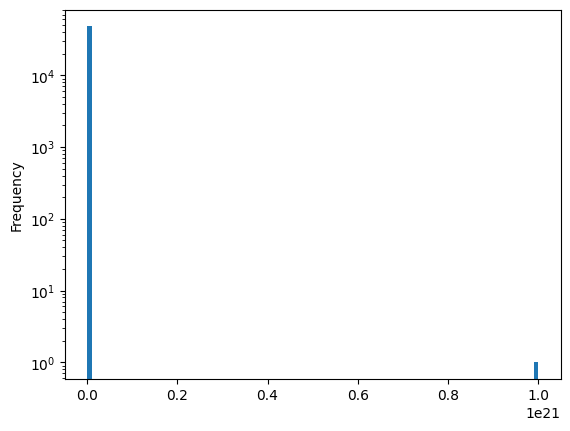

In [17]:
df['CompTotal'].plot.hist(log=True, bins=100)

In [18]:
# CompTotal null replace, cast to int
# df['CompTotal'] = df['CompTotal'].fillna(0).astype(np.int64, errors='ignore')

#### V. Check and remove nonsense answers and unreadable data

In [19]:
# Every question that allows user input should be checked in order to avoid nonsense answers

# First approach on CodingActivities, checking nonsense answers
with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
    display(df['CodingActivities'][
        (df['CodingActivities'].str.contains('Hobby') != True) &
        (df['CodingActivities'].str.contains('Freelance/contract') != True) &
        (df['CodingActivities'].str.contains('Contribute to open-source') != True) &
        (df['CodingActivities'].str.contains('Bootstrapping a business') != True) &
        (df['CodingActivities'].str.contains('School or academic') != True) &
        (df['CodingActivities'].str.contains('Professional development') != True) &
        (df['CodingActivities'].str.contains('code outside of work') != True &
        (df['CodingActivities'].str.contains('NA') != True))
        ].head(5))

85      Other (please specify):
295     Other (please specify):
1181    Other (please specify):
1205    Other (please specify):
1365    Other (please specify):
Name: CodingActivities, dtype: object

In [20]:
# more effective approach
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 200

listed_LC = df['LearnCode'].str.split(';')
print(f'LearnCode answers: ')
display(listed_LC.explode().unique())

listed_LCO = df['LearnCodeOnline'].str.split(';')
print('LearnCodeOnline answers:')
display(listed_LCO.explode().unique())
# Nonsense answer to delete
#display(listed_LCO.explode()[listed_LCO.explode() == 'Click to write Choice 20'])

listed_LCCC = df['LearnCodeCoursesCert'].str.split(';')
print('LearnCodeCoursesCert answers:')
display(listed_LCCC.explode().unique())

listed_DT = df['DevType'].str.split(';')
print('DevType answers:')
display(listed_DT.explode().unique())

listed_TL = df['TechList'].str.split(';')
print('TechList answers:')
display(listed_TL.explode().unique())

listed_BNT = df['BuyNewTool'].str.split(';')
print('BuyNewTool answers:')
display(listed_BNT.explode().unique())

listed_L = df['LanguageHaveWorkedWith'].str.split(';')
print('Language answers:')
display(listed_L.explode().unique())

# It seems like questions of multiple choice together with user inputs doesn't have this data,
# because of that further checking of these type of columns will be omitted.
pd.reset_option('display.max_rows')
pd.reset_option('display.max_colwidth')

LearnCode answers: 


array(['Books / Physical media', 'Colleague', 'Friend or family member',
       'Hackathons (virtual or in-person)',
       'Online Courses or Certification', 'On the job training',
       'Other online resources (e.g., videos, blogs, forum)',
       'School (i.e., University, College, etc)', 'Coding Bootcamp',
       'Other (please specify):', 'NA'], dtype=object)

LearnCodeOnline answers:


array(['Formal documentation provided by the owner of the tech',
       'Blogs with tips and tricks', 'Books', 'Recorded coding sessions',
       'How-to videos', 'Video-based Online Courses',
       'Written-based Online Courses',
       'Auditory material (e.g., podcasts)',
       'Online challenges (e.g., daily or weekly coding challenges)',
       'Written Tutorials', 'Click to write Choice 20', 'Stack Overflow',
       'Interactive tutorial', 'Certification videos', 'NA',
       'Programming Games', 'Other (Please specify):'], dtype=object)

LearnCodeCoursesCert answers:


array(['Other', 'NA', 'Codecademy', 'edX', 'Udemy', 'Pluralsight',
       'Coursera', 'Udacity', 'Skillsoft'], dtype=object)

DevType answers:


array(['Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'System administrator',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional',
       'Research & Development role', 'NA', 'Other (please specify):',
       'Developer, mobile', 'Database administrator',
       'Developer, embedded applications or devices', 'Student',
       'Engineer, data', 'Product manager', 'Academic researcher',
       'Developer, game or graphics', 'Cloud infrastructure engineer',
       'Engineering manager', 'Developer Experience', 'Project manager',
       'DevOps specialist', 'Engineer, site reliability', 'Blockchain',
       'Developer Advocate', 'Educator', 'Scientist', 'Hardware Engineer',
       'Marketing or sales professional'], dtype=object)

TechList answers:


array(['Investigate', 'Given a list', 'NA', 'Other'], dtype=object)

BuyNewTool answers:


array(['Start a free trial', 'Ask developers I know/work with',
       'Visit developer communities like Stack Overflow',
       'Other (please specify):',
       'Research companies that have advertised on sites I visit',
       'Read ratings or reviews on third party sites like G2 Crowd',
       'Ask a generative AI tool',
       'Research companies that have emailed me', 'NA'], dtype=object)

Language answers:


array(['HTML/CSS', 'JavaScript', 'Python', 'Bash/Shell (all shells)',
       'Go', 'PHP', 'Ruby', 'SQL', 'TypeScript', 'Ada', 'Clojure',
       'Elixir', 'Java', 'Lisp', 'OCaml', 'Raku', 'Scala', 'Swift', 'Zig',
       'Rust', 'C#', 'PowerShell', 'C++', 'Kotlin', 'Solidity', 'C',
       'Perl', 'Dart', 'Haskell', 'Assembly', 'Delphi', 'R', 'Lua', 'VBA',
       'Visual Basic (.Net)', 'Julia', 'MATLAB', 'F#', 'Groovy', 'APL',
       'Objective-C', 'GDScript', 'Crystal', 'Erlang', 'Cobol', 'Fortran',
       'Prolog', 'Apex', 'NA', 'SAS', 'Nim', 'Flow'], dtype=object)

In [21]:
rows = df[df["CompTotal"] > df["CompTotal"].quantile(0.9996)]
print(f"{rows['CompTotal'].min():5e}")
df["CompTotal"].quantile(0.995)
print(f'Removed {len(rows)}')
df.drop(rows.index, inplace=True)

8.000000e+09
Removed 20


#### VI. Categorize

In [ ]:
# Convert text values to numeric at first, later categorize data by specified ranges
df.loc[df['YearsCode'] == 'Less than 1 year', 'YearsCode'] = '0'
df.loc[df['YearsCode'] == 'More than 50 years', 'YearsCode'] = '51'

df['YearsCode'] = df['YearsCode'].astype(np.int32)

bins = [-np.inf, 1, 3, 6, 10, 15, 25, 35, 50, np.inf]
names = ['<1', '1-3', '3-6', '6-10', '10-15', '15-25', '25-35', '35-50', '50<']

df['YearsCode'] = pd.cut(df['YearsCode'], bins, labels=names)

### Testing section

In [24]:
df[df[''] == 'NA']

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,ConvertedCompYearly


In [60]:
df['ConvertedCompYearly'].unique()

array([285000., 250000., 156000., ...,   1606., 319711.,  16917.])

In [ ]:
converted = df['YearsCode'].astype('category')
converted_codes = converted.cat.codes

converted.dtypes

In [ ]:
print(df['MainBranch'].unique())
print(df['Age'].unique())
print(df['RemoteWork'].unique())
print(df['EdLevel'].unique())